In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
# Load dataset from vgsales.csv and display first five rows
sales_data = pd.read_csv('vgsales.csv')
sales_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Explore the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Explore the dataset (continued)
sales_data.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [5]:
# Load dataset from vgratings.csv and display first five rows
ratings_data = pd.read_csv('vgratings.csv')
ratings_data.head()

,Number,Name,Platform,Release_Date,Metascore,Userscore
0,1.0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,2.0,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,3.0,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.6
3,4.0,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5
4,5.0,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9


In [6]:
# Explore the dataset
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18009 entries, 0 to 18008
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        18009 non-null  float64
 1   Name          18009 non-null  object 
 2   Platform      18009 non-null  object 
 3   Release_Date  18009 non-null  object 
 4   Metascore     18009 non-null  int64  
 5   Userscore     18009 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 844.3+ KB


In [7]:
# Explore the dataset (continued)
ratings_data.describe(include="all")

,Number,Name,Platform,Release_Date,Metascore,Userscore
count,18009.000000,18009,18009,18009,18009.000000,18009
unique,NaN,11820,22,4366,NaN,95
top,NaN,Madden NFL 07,PC,"November 14, 2006",NaN,tbd
freq,NaN,9,4605,48,NaN,1277
mean,9005.000000,NaN,NaN,NaN,70.405408,NaN
std,5198.894834,NaN,NaN,NaN,12.396993,NaN
min,1.000000,NaN,NaN,NaN,11.000000,NaN
25%,4503.000000,NaN,NaN,NaN,63.000000,NaN
50%,9005.000000,NaN,NaN,NaN,72.000000,NaN
75%,13507.000000,NaN,NaN,NaN,79.000000,NaN


In [8]:
# Display all distinct platforms for each dataset
print('Distinct platforms in sales_data: ', sales_data['Platform'].unique())
print('Distinct platforms in ratings_data: ', ratings_data['Platform'].unique())

Distinct platforms in sales_data:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Distinct platforms in ratings_data:  ['Nintendo 64' 'PlayStation' 'PlayStation 3' 'Dreamcast' 'Xbox 360' 'Wii'
 'Xbox One' 'Switch' 'PlayStation 2' 'PlayStation 4' 'GameCube' 'Xbox'
 'PC' 'Wii U' 'Game Boy Advance' '3DS' 'DS' 'PlayStation Vita'
 'PlayStation 5' 'PSP' 'Xbox Series X' 'Stadia']


In [9]:
# Display number of unique games and platforms for each dataset
print('# of unique games in sales_data: ', sales_data['Name'].unique().size)
print('# of unique games in ratings_data: ', ratings_data['Name'].unique().size)
print('# of unique platforms in sales_data: ', sales_data['Platform'].unique().size)
print('# of unique platforms in ratings_data: ', ratings_data['Platform'].unique().size)

# of unique games in sales_data:  11493
# of unique games in ratings_data:  11820
# of unique platforms in sales_data:  31
# of unique platforms in ratings_data:  22


In [10]:
# Replace the abbreviated 'Platform' data in sales_data w/ its full abbreviation
abbreviated_platforms = {
    "Wii": "Wii",
    "NES": "Nintendo Entertainment System",
    "GB": "Game Boy",
    "DS": "DS",
    "X360": "Xbox 360",
    "PS3": "PlayStation 3",
    "PS2": "PlayStation 2",
    "SNES": "Super Nintendo Entertainment System",
    "GBA": "Game Boy Advance",
    "3DS": "3DS",
    "PS4": "PlayStation 4",
    "N64": "Nintendo 64",
    "PS": "PlayStation",
    "XB": "Xbox",
    "PC": "PC",
    "2600": "Atari 2600",
    "PSP": "PSP",
    "XOne": "Xbox One",
    "GC": "GameCube",
    "WiiU": "Wii U",
    "GEN": "Sega Genesis",
    "DC": "Dreamcast",
    "PSV": "PlayStation Vita",
    "SAT": "Sega Saturn",
    "SCD": "SCD",
    "WS": "WonderSwan",
    "NG": "NG",
    "TG16": "TurboGrafx-16",
    "3DO": "3DO Interactive Multiplayer",
    "GG": "Game Gear",
    "PCFX": "PC-FX",
}
sales_data['Platform'] = sales_data['Platform'].map(abbreviated_platforms)
print('Distinct platforms in sales_data: ', sales_data['Platform'].unique())
print('Distinct platforms in ratings_data: ', ratings_data['Platform'].unique())

Distinct platforms in sales_data:  ['Wii' 'Nintendo Entertainment System' 'Game Boy' 'DS' 'Xbox 360'
 'PlayStation 3' 'PlayStation 2' 'Super Nintendo Entertainment System'
 'Game Boy Advance' '3DS' 'PlayStation 4' 'Nintendo 64' 'PlayStation'
 'Xbox' 'PC' 'Atari 2600' 'PSP' 'Xbox One' 'GameCube' 'Wii U'
 'Sega Genesis' 'Dreamcast' 'PlayStation Vita' 'Sega Saturn' 'SCD'
 'WonderSwan' 'NG' 'TurboGrafx-16' '3DO Interactive Multiplayer'
 'Game Gear' 'PC-FX']
Distinct platforms in ratings_data:  ['Nintendo 64' 'PlayStation' 'PlayStation 3' 'Dreamcast' 'Xbox 360' 'Wii'
 'Xbox One' 'Switch' 'PlayStation 2' 'PlayStation 4' 'GameCube' 'Xbox'
 'PC' 'Wii U' 'Game Boy Advance' '3DS' 'DS' 'PlayStation Vita'
 'PlayStation 5' 'PSP' 'Xbox Series X' 'Stadia']


In [11]:
# Drop 'Rank' in sales_data
sales_data = sales_data.drop(columns=['Rank'])
sales_data.shape

(16598, 10)

In [12]:
# Replace 'Publisher' missing values in sales_data (e.g., with 'Unknown')
sales_data['Publisher'] = sales_data['Publisher'].fillna('Unknown')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [13]:
# Drop missing values from variable 'Year' in sales_data
sales_data = sales_data.dropna()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16327 non-null  object 
 1   Platform      16327 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16327 non-null  object 
 4   Publisher     16327 non-null  object 
 5   NA_Sales      16327 non-null  float64
 6   EU_Sales      16327 non-null  float64
 7   JP_Sales      16327 non-null  float64
 8   Other_Sales   16327 non-null  float64
 9   Global_Sales  16327 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
# Convert the variable 'Year' in sales_data from type float64 to type int64
sales_data['Year'] = sales_data['Year'].map(lambda x: int(x))
print('Year type:', type(sales_data['Year'][0]))

Year type: <class 'numpy.int64'>


In [15]:
# Drop 'Number' in sales_data
ratings_data = ratings_data.drop(columns=['Number'])
ratings_data.shape

(18009, 5)

In [16]:
# Replace 'tbd' values in ratings_data with np.nan and convert 'Userscore' variable to type float64
ratings_data['Userscore'] = ratings_data['Userscore'].replace('tbd', np.nan).astype(float)
print('Userscore type:', type(ratings_data['Userscore'][0]))
ratings_data[ratings_data.isna().any(axis=1)]

Userscore type: <class 'numpy.float64'>


,Name,Platform,Release_Date,Metascore,Userscore
497,Madden NFL 2005,GameCube,"August 9, 2004",90,NaN
924,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",88,NaN
1220,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",86,NaN
1410,Moto Racer Advance,Game Boy Advance,"December 5, 2002",86,NaN
2109,Pinball FX 2: Marvel Pinball - Vengeance and V...,Xbox 360,"December 13, 2011",84,NaN
...,...,...,...,...,...
17817,Jackass the Game,DS,"January 8, 2008",35,NaN
17840,King of Clubs,Wii,"August 4, 2008",35,NaN
17900,Jenga World Tour,DS,"November 13, 2007",32,NaN
17915,Dream Chronicles,PlayStation 3,"November 23, 2010",31,NaN


In [17]:
# Create a new variable named 'Year' in the ratings_data from the 'Release_Date' variable
ratings_data['Year'] = ratings_data['Release_Date'].map(lambda str: int(str.split()[2]))
ratings_data.head()

,Name,Platform,Release_Date,Metascore,Userscore,Year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.6,2008
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9,2008


In [18]:
# Drop missing values from variable 'Userscore' in ratings_data
ratings_data = ratings_data.dropna()
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16732 entries, 0 to 18008
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16732 non-null  object 
 1   Platform      16732 non-null  object 
 2   Release_Date  16732 non-null  object 
 3   Metascore     16732 non-null  int64  
 4   Userscore     16732 non-null  float64
 5   Year          16732 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 915.0+ KB


In [19]:
# Lowercase variable 'Name' on both datasets
sales_data['Name'] = sales_data['Name'].str.lower()
ratings_data['Name'] = ratings_data['Name'].str.lower()

In [20]:
# Merge both datasets into one using 'Name', 'Platform' and 'Year' and drop 'Year'
data = pd.merge(sales_data, ratings_data, how="inner", on=['Name', 'Platform', 'Year'])
data = data.drop(columns=['Year'])
data['Name'] = data['Name'].map(lambda str: str.title()) # For ecstatic
data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Metascore,Userscore
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,"November 19, 2006",76,8.0
1,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,"April 27, 2008",82,8.4
2,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,"July 26, 2009",80,8.1
3,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,"May 15, 2006",89,8.5
4,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,"November 15, 2009",87,8.3


In [21]:
# Create two new variables named 'Season' and 'Season_Number' in the merged dataset
def get_season(str):
    if (str == 'March' or str == 'April' or str == 'May'):
        return 'Spring'
    elif (str == 'June' or str == 'July' or str == 'August'):
        return 'Summer'
    elif (str == 'September' or str == 'October' or str == 'November'):
        return 'Autumn'
    elif (str == 'December' or str == 'January' or str == 'February'):
        return 'Winter'
    else:
        return 'Other'
    
data['Season'] = data['Release_Date'].map(lambda x: get_season(x.split()[0]))
print('Unique seasons:', data['Season'].unique()) # Verify we didn't get 'Other'

seasons_key = {
    "Spring": 0,
    "Summer": 1,
    "Autumn": 2,
    "Winter": 3,
}

data['Season_Number'] = data['Season'].map(seasons_key)
print('Unique season numbers:', data['Season_Number'].unique()) # Verify we only got 0-3

Unique seasons: ['Autumn' 'Spring' 'Summer' 'Winter']
Unique season numbers: [2 0 1 3]


In [22]:
# Explore the merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 0 to 5732
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5733 non-null   object 
 1   Platform       5733 non-null   object 
 2   Genre          5733 non-null   object 
 3   Publisher      5733 non-null   object 
 4   NA_Sales       5733 non-null   float64
 5   EU_Sales       5733 non-null   float64
 6   JP_Sales       5733 non-null   float64
 7   Other_Sales    5733 non-null   float64
 8   Global_Sales   5733 non-null   float64
 9   Release_Date   5733 non-null   object 
 10  Metascore      5733 non-null   int64  
 11  Userscore      5733 non-null   float64
 12  Season         5733 non-null   object 
 13  Season_Number  5733 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 671.8+ KB


In [23]:
# Explore the merged dataset (continued)
data.describe(include="all")

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Date,Metascore,Userscore,Season,Season_Number
count,5733,5733,5733,5733,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733,5733.000000,5733.000000,5733,5733.000000
unique,3614,18,12,215,NaN,NaN,NaN,NaN,NaN,1772,NaN,NaN,4,NaN
top,Madden Nfl 07,PlayStation 2,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,"November 14, 2006",NaN,NaN,Autumn,NaN
freq,7,931,1387,837,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,2841,NaN
mean,NaN,NaN,NaN,NaN,0.431366,0.255125,0.051877,0.086984,0.825575,NaN,71.113553,7.185086,NaN,1.534450
std,NaN,NaN,NaN,NaN,1.028085,0.709980,0.250638,0.267003,2.038636,NaN,13.522610,1.335299,NaN,0.946257
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,NaN,17.000000,1.300000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.070000,0.020000,0.000000,0.010000,0.120000,NaN,63.000000,6.500000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,0.170000,0.070000,0.000000,0.020000,0.320000,NaN,73.000000,7.500000,NaN,2.000000
75%,NaN,NaN,NaN,NaN,0.430000,0.230000,0.010000,0.080000,0.820000,NaN,81.000000,8.100000,NaN,2.000000


In [24]:
#4 Compute the mean for sales in the spring season

#Spring NA sales
na_spring = data.loc[data['Season_Number'].isin(["0"]), 'NA_Sales'].mean()
print("Spring mean of NA_Sales (in millions):",na_spring)

#Spring EU sales
eu_spring = data.loc[data['Season_Number'].isin(["0"]), 'EU_Sales'].mean()
print("Spring mean of EU_Sales (in millions):",eu_spring)

#Spring JP sales
jp_spring = data.loc[data['Season_Number'].isin(["0"]), 'JP_Sales'].mean()
print("Spring mean of JP_Sales (in millions):",jp_spring)

#Spring Other sales
oth_spring = data.loc[data['Season_Number'].isin(["0"]), 'Other_Sales'].mean()
print("Spring mean of Other_Sales (in millions):",oth_spring)

#Spring Global sales
glo_spring = data.loc[data['Season_Number'].isin(["0"]), 'Global_Sales'].mean()
print("Spring mean of Global_Sales (in millions):",glo_spring)

na_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'NA_Sales']
eu_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'EU_Sales']
jp_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'JP_Sales']
oth_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Other_Sales']
glo_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Global_Sales']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
spring_stat, p_spring = f_oneway(na_spring2 , eu_spring2 , jp_spring2, oth_spring2 , glo_spring2)
print('Spring Statistics =%.3f, Spring p value =%.10f' % (spring_stat, p_spring))

a = 0.05
if p_spring > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')


Spring mean of NA_Sales (in millions): 0.34773471145564
Spring mean of EU_Sales (in millions): 0.21390180878552978
Spring mean of JP_Sales (in millions): 0.050378983634797626
Spring mean of Other_Sales (in millions): 0.07100775193798539
Spring mean of Global_Sales (in millions): 0.6834366925064586
Spring Statistics =96.749, Spring p value =0.0000000000
Different distributions (reject null)


In [25]:
#4 Compute the mean for sales in the summer season

# Compute summer NA sales
na_summer = data.loc[data['Season_Number'].isin(["1"]), 'NA_Sales'].mean()
print("Summer mean of NA_Sales (in millions):",na_summer)

#Computer summer EU sales
eu_summer = data.loc[data['Season_Number'].isin(["1"]), 'EU_Sales'].mean()
print("Summer mean of EU_Sales (in millions):",eu_summer)

#Compute summer JP sales
jp_summer = data.loc[data['Season_Number'].isin(["1"]), 'JP_Sales'].mean()
print("Summer mean of JP_Sales (in millions):",jp_summer)

#Compute summer Other sales
oth_summer = data.loc[data['Season_Number'].isin(["1"]), 'Other_Sales'].mean()
print("Summer mean of Other_Sales (in millions):",oth_summer)


#Compute summer Global sales
glo_summer = data.loc[data['Season_Number'].isin(["1"]), 'Global_Sales'].mean()
print("Summer mean of Global_Sales (in millions):",glo_summer)

na_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'NA_Sales']
eu_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'EU_Sales']
jp_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'JP_Sales']
oth_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Other_Sales']
glo_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Global_Sales']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
summer_stat, p_summer = f_oneway(na_summer2 , eu_summer2 , jp_summer2, oth_summer2 , glo_summer2)
print('Summer Statistics =%.3f, Summer p value =%.10f' % (summer_stat, p_summer))

a = 0.05
if p_summer > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')

Summer mean of NA_Sales (in millions): 0.379971126082771
Summer mean of EU_Sales (in millions): 0.1739557266602502
Summer mean of JP_Sales (in millions): 0.03943214629451397
Summer mean of Other_Sales (in millions): 0.06118383060635219
Summer mean of Global_Sales (in millions): 0.6546775745909503
Summer Statistics =112.122, Summer p value =0.0000000000
Different distributions (reject null)


In [26]:
#4 Compute the mean for sales in the autumn season

# Compute autumn NA sales
na_autumn = data.loc[data['Season_Number'].isin(["2"]), 'NA_Sales'].mean()
print("Autumn mean of NA_Sales (in millions):",na_autumn)

#Compute autumn EU sales
eu_autumn = data.loc[data['Season_Number'].isin(["2"]), 'EU_Sales'].mean()
print("Autumn mean of EU_Sales (in millions):",eu_autumn)

#Compute autumn JP sales
jp_autumn = data.loc[data['Season_Number'].isin(["2"]), 'JP_Sales'].mean()
print("Autumn mean of JP_Sales (in millions):",jp_autumn)

#Compute autumn Other sales
oth_autumn = data.loc[data['Season_Number'].isin(["2"]), 'Other_Sales'].mean()
print("Autumn mean of Other_Sales (in millions):",oth_autumn)


#Compute autumn Global sales
glo_autumn = data.loc[data['Season_Number'].isin(["2"]), 'Global_Sales'].mean()
print("Autumn mean of Global_Sales (in millions):",glo_autumn)

na_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'NA_Sales']
eu_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'EU_Sales']
jp_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'JP_Sales']
oth_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Other_Sales']
glo_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Global_Sales']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
autumn_stat, p_autumn = f_oneway(na_autumn2 , eu_autumn2 , jp_autumn2, oth_autumn2 , glo_autumn2)
print('Autumn Statistics =%.3f, Autumn p value =%.10f' % (autumn_stat, p_autumn))

a = 0.05
if p_autumn > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')

Autumn mean of NA_Sales (in millions): 0.5144139387539517
Autumn mean of EU_Sales (in millions): 0.3199999999999944
Autumn mean of JP_Sales (in millions): 0.05778247096092911
Autumn mean of Other_Sales (in millions): 0.10954593453009044
Autumn mean of Global_Sales (in millions): 1.00194649771208
Autumn Statistics =241.236, Autumn p value =0.0000000000
Different distributions (reject null)


In [27]:
#4 Compute the mean for sales in the winter season

# Compute winter NA sales
na_winter = data.loc[data['Season_Number'].isin(["3"]), 'NA_Sales'].mean()
print("Winter mean of NA_Sales (in millions):",na_winter)

#Compute winter EU sales
eu_winter = data.loc[data['Season_Number'].isin(["3"]), 'EU_Sales'].mean()
print("Winter mean of EU_Sales (in millions):",eu_winter)

#Compute winter JP sales
jp_winter = data.loc[data['Season_Number'].isin(["3"]), 'JP_Sales'].mean()
print("Winter mean of JP_Sales (in millions):",jp_winter)

#Compute winter Other sales
oth_winter = data.loc[data['Season_Number'].isin(["3"]), 'Other_Sales'].mean()
print("Winter mean of Other_Sales (in millions):",oth_winter)


#Computer winter Global sales
glo_winter = data.loc[data['Season_Number'].isin(["3"]), 'Global_Sales'].mean()
print("Winter mean of Global_Sales (in millions):",glo_winter)

na_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'NA_Sales']
eu_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'EU_Sales']
jp_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'JP_Sales']
oth_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Other_Sales']
glo_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Global_Sales']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
winter_stat, p_winter = f_oneway(na_winter2 , eu_winter2 , jp_winter2, oth_winter2 , glo_winter2)
print('Winter Statistics =%.3f, Winter p value =%.10f' % (winter_stat, p_winter))

a = 0.05
if p_winter > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')


Winter mean of NA_Sales (in millions): 0.30789017341040487
Winter mean of EU_Sales (in millions): 0.17981213872832416
Winter mean of JP_Sales (in millions): 0.048829479768786196
Winter mean of Other_Sales (in millions): 0.05989884393063566
Winter mean of Global_Sales (in millions): 0.5965462427745645
Winter Statistics =116.492, Winter p value =0.0000000000
Different distributions (reject null)


In [28]:
#4 Compute the mean for metascore in all of the seasons

#Spring metascore
spring_meta = data.loc[data['Season_Number'].isin(["0"]), 'Metascore'].mean()
print("Spring mean of metascore (out of 100):",spring_meta)

#Summer metascore
summer_meta = data.loc[data['Season_Number'].isin(["1"]), 'Metascore'].mean()
print("Summer mean of metascore (out of 100):",summer_meta)

#Autumn metascore
autumn_meta = data.loc[data['Season_Number'].isin(["2"]), 'Metascore'].mean()
print("Autumn mean of metascore (out of 100):",autumn_meta)

#Winter metascore
winter_meta = data.loc[data['Season_Number'].isin(["3"]), 'Metascore'].mean()
print("Winter mean of metascore (out of 100):",winter_meta)

spring_meta2 = data.loc[data['Season_Number'].isin(["0"]), 'Metascore']
summer_meta2 = data.loc[data['Season_Number'].isin(["1"]), 'Metascore']
autumn_meta2 = data.loc[data['Season_Number'].isin(["2"]), 'Metascore']
winter_meta2 = data.loc[data['Season_Number'].isin(["3"]), 'Metascore']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
meta_stat, p_meta = f_oneway(spring_meta2 , summer_meta2 , autumn_meta2 , winter_meta2)
print('Metascore Statistics =%.3f, Metascore p value =%.10f' % (meta_stat, p_meta))

a = 0.05
if p_meta > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')


Spring mean of metascore (out of 100): 70.64599483204134
Summer mean of metascore (out of 100): 70.2752646775746
Autumn mean of metascore (out of 100): 71.79584653291094
Winter mean of metascore (out of 100): 70.35549132947978
Metascore Statistics =4.940, Metascore p value =0.0019951256
Different distributions (reject null)


In [29]:
#4 Compute the mean for userscore in all of the seasons

#Spring userscore
spring_user = data.loc[data['Season_Number'].isin(["0"]), 'Userscore'].mean()
print("Spring mean of userscore (out of 10):",spring_user)

#Summer userscore
summer_user = data.loc[data['Season_Number'].isin(["1"]), 'Userscore'].mean()
print("Summer mean of userscore (out of 10):",summer_user)

#Autumn userscore
autumn_user = data.loc[data['Season_Number'].isin(["2"]), 'Userscore'].mean()
print("Autumn mean of userscore (out of 10):",autumn_user)

#Winter userscore
winter_user = data.loc[data['Season_Number'].isin(["3"]), 'Userscore'].mean()
print("Winter mean of userscore (out of 10):",winter_user)

spring_user2 = data.loc[data['Season_Number'].isin(["0"]), 'Userscore']
summer_user2 = data.loc[data['Season_Number'].isin(["1"]), 'Userscore']
autumn_user2 = data.loc[data['Season_Number'].isin(["2"]), 'Userscore']
winter_user2 = data.loc[data['Season_Number'].isin(["3"]), 'Userscore']

#Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
user_stat, p_user = f_oneway(spring_user2 , summer_user2 , autumn_user2 , winter_user2)
print('Userscore Statistics =%.3f, Userscore p value =%.10f' % (user_stat, p_user))

a = 0.05
if p_user > a:
    print('Same distributions (fail to reject null)')
else:
    print('Different distributions (reject null)')

Spring mean of userscore (out of 10): 7.157105943152471
Summer mean of userscore (out of 10): 7.112897016361882
Autumn mean of userscore (out of 10): 7.213586765223489
Winter mean of userscore (out of 10): 7.223410404624274
Userscore Statistics =1.804, Userscore p value =0.1440623382
Same distributions (fail to reject null)


In [30]:
#4 Compare the spring sales, metascore, and user score

# Compute descriptive statistics
na_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'NA_Sales'].describe()
eu_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'EU_Sales'].describe()
jp_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'JP_Sales'].describe()
oth_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Other_Sales'].describe()
glo_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Global_Sales'].describe()
spring_user2 = data.loc[data['Season_Number'].isin(["0"]), 'Userscore'].describe()
spring_meta2 = data.loc[data['Season_Number'].isin(["0"]), 'Metascore'].describe()

# Print descriptive statistics
print("Spring summary for NA_Sales")
print(na_spring2)
print("\n")
print("Spring summary for EU_Sales")
print(eu_spring2)
print("\n")
print("Spring summary for JP_Sales")
print(jp_spring2)
print("\n")
print("Spring summary for Other_Sales")
print(oth_spring2)
print("\n")
print("Spring summary for Global_Sales")
print(glo_spring2)
print("\n")
print("Spring summary for Userscore")
print(spring_user2)
print("\n")
print("Spring summary for Metascore")
print(spring_meta2)




Spring summary for NA_Sales
count    1161.000000
mean        0.347735
std         0.788533
min         0.000000
25%         0.060000
50%         0.150000
75%         0.360000
max        15.850000
Name: NA_Sales, dtype: float64


Spring summary for EU_Sales
count    1161.000000
mean        0.213902
std         0.572546
min         0.000000
25%         0.020000
50%         0.070000
75%         0.210000
max        12.880000
Name: EU_Sales, dtype: float64


Spring summary for JP_Sales
count    1161.000000
mean        0.050379
std         0.279975
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         6.500000
Name: JP_Sales, dtype: float64


Spring summary for Other_Sales
count    1161.000000
mean        0.071008
std         0.181341
min         0.000000
25%         0.010000
50%         0.020000
75%         0.070000
max         3.310000
Name: Other_Sales, dtype: float64


Spring summary for Global_Sales
count    1161.000000
mean        0.683437
std 

In [31]:
#4 Compare the summer sales, metascore, and user score

# Compute descriptive statistics
na_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'NA_Sales'].describe()
eu_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'EU_Sales'].describe()
jp_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'JP_Sales'].describe()
oth_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Other_Sales'].describe()
glo_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Global_Sales'].describe()
summer_user2 = data.loc[data['Season_Number'].isin(["1"]), 'Userscore'].describe()
summer_meta2 = data.loc[data['Season_Number'].isin(["1"]), 'Metascore'].describe()
# Print descriptive statistics
print("Summer summary for NA_Sales")
print(na_summer2)
print("\n")
print("Summer summary for EU_Sales")
print(eu_summer2)
print("\n")
print("Summer summary for JP_Sales")
print(jp_summer2)
print("\n")
print("Summer summary for Other_Sales")
print(oth_summer2)
print("\n")
print("Summer summary for Global_Sales")
print(glo_summer2)
print("\n")
print("Summer summary for Userscore")
print(summer_user2)
print("\n")
print("Summer summary for Metascore")
print(summer_meta2)


Summer summary for NA_Sales
count    1039.000000
mean        0.379971
std         0.789904
min         0.000000
25%         0.050000
50%         0.140000
75%         0.375000
max        15.750000
Name: NA_Sales, dtype: float64


Summer summary for EU_Sales
count    1039.000000
mean        0.173956
std         0.503039
min         0.000000
25%         0.020000
50%         0.060000
75%         0.170000
max        11.010000
Name: EU_Sales, dtype: float64


Summer summary for JP_Sales
count    1039.000000
mean        0.039432
std         0.190785
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.280000
Name: JP_Sales, dtype: float64


Summer summary for Other_Sales
count    1039.000000
mean        0.061184
std         0.140068
min         0.000000
25%         0.010000
50%         0.020000
75%         0.060000
max         2.960000
Name: Other_Sales, dtype: float64


Summer summary for Global_Sales
count    1039.000000
mean        0.654678
std 

In [32]:
#4 Compare the autumn sales, metascore, and user score

# Compute descriptive statistics
na_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'NA_Sales'].describe()
eu_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'EU_Sales'].describe()
jp_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'JP_Sales'].describe()
oth_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Other_Sales'].describe()
glo_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Global_Sales'].describe()
autumn_user2 = data.loc[data['Season_Number'].isin(["1"]), 'Userscore'].describe()
autumn_meta2 = data.loc[data['Season_Number'].isin(["1"]), 'Metascore'].describe()
# Print descriptive statistics
print("Autumn summary for NA_Sales")
print(na_autumn2)
print("\n")
print("Autumn summary for EU_Sales")
print(eu_autumn2)
print("\n")
print("Autumn summary for JP_Sales")
print(jp_autumn2)
print("\n")
print("Autumn summary for Other_Sales")
print(oth_autumn2)
print("\n")
print("Autumn summary for Global_Sales")
print(glo_autumn2)
print("\n")
print("Autumn summary for Userscore")
print(autumn_user2)
print("\n")
print("Autumn summary for Metascore")
print(autumn_meta2)

Autumn summary for NA_Sales
count    2841.000000
mean        0.514414
std         1.258246
min         0.000000
25%         0.080000
50%         0.200000
75%         0.500000
max        41.490000
Name: NA_Sales, dtype: float64


Autumn summary for EU_Sales
count    2841.000000
mean        0.320000
std         0.867835
min         0.000000
25%         0.020000
50%         0.080000
75%         0.290000
max        29.020000
Name: EU_Sales, dtype: float64


Autumn summary for JP_Sales
count    2841.000000
mean        0.057782
std         0.249768
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         4.700000
Name: JP_Sales, dtype: float64


Autumn summary for Other_Sales
count    2841.000000
mean        0.109546
std         0.345211
min         0.000000
25%         0.010000
50%         0.030000
75%         0.090000
max        10.570000
Name: Other_Sales, dtype: float64


Autumn summary for Global_Sales
count    2841.000000
mean        1.001946
std 

In [33]:
#4 Compare the winter sales, metascore, and user score

# Compute descriptive statistics
na_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'NA_Sales'].describe()
eu_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'EU_Sales'].describe()
jp_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'JP_Sales'].describe()
oth_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Other_Sales'].describe()
glo_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Global_Sales'].describe()
winter_user2 = data.loc[data['Season_Number'].isin(["1"]), 'Userscore'].describe()
winter_meta2 = data.loc[data['Season_Number'].isin(["1"]), 'Metascore'].describe()

# Print descriptive statistics
print("Winter summary for NA_Sales")
print(na_winter2)
print("\n")
print("Winter summary for EU_Sales")
print(eu_winter2)
print("\n")
print("Winter summary for JP_Sales")
print(jp_winter2)
print("\n")
print("Winter summary for Other_Sales")
print(oth_winter2)
print("\n")
print("Winter summary for Global_Sales")
print(glo_winter2)
print("\n")
print("Winter summary for Userscore")
print(winter_user2)
print("\n")
print("Winter summary for Metascore")
print(winter_meta2)


Winter summary for NA_Sales
count    692.000000
mean       0.307890
std        0.469482
min        0.000000
25%        0.060000
50%        0.140000
75%        0.350000
max        4.740000
Name: NA_Sales, dtype: float64


Winter summary for EU_Sales
count    692.000000
mean       0.179812
std        0.346168
min        0.000000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.910000
Name: EU_Sales, dtype: float64


Winter summary for JP_Sales
count    692.000000
mean       0.048829
std        0.279374
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.330000
Name: JP_Sales, dtype: float64


Winter summary for Other_Sales
count    692.000000
mean       0.059899
std        0.112471
min        0.000000
25%        0.010000
50%        0.020000
75%        0.070000
max        1.090000
Name: Other_Sales, dtype: float64


Winter summary for Global_Sales
count    692.000000
mean       0.596546
std        1.042251
min        0.01000

Visualizing Spring NA_Sales


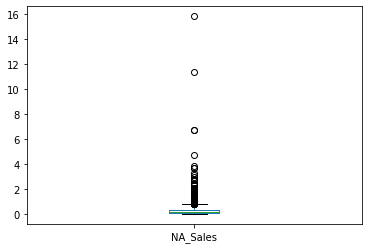

In [34]:
#4 Create plots to visualize the results
# Spring NA_Sales
print("Visualizing Spring NA_Sales")
na_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'NA_Sales']
na_spring2.plot(kind="box")

Visualizing Spring EU_Sales


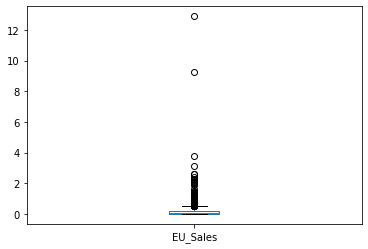

In [35]:
#4 Create plots to visualize the results
# Spring EU_Sales
print("Visualizing Spring EU_Sales")
eu_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'EU_Sales']
eu_spring2.plot(kind="box")

Visualizing Spring JP_Sales


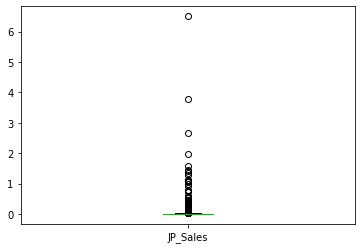

In [36]:
#4 Create plots to visualize the results
# Spring JP_Sales
print("Visualizing Spring JP_Sales")
jp_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'JP_Sales']
jp_spring2.plot(kind="box")

Visualizing Spring Other_Sales


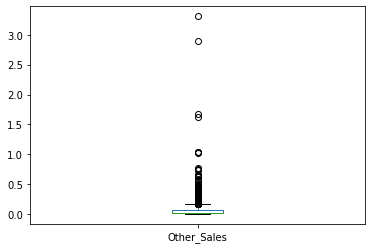

In [37]:
#4 Create plots to visualize the results
# Spring Other_Sales
print("Visualizing Spring Other_Sales")
oth_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Other_Sales']
oth_spring2.plot(kind="box")

Visualizing Spring Global_Sales


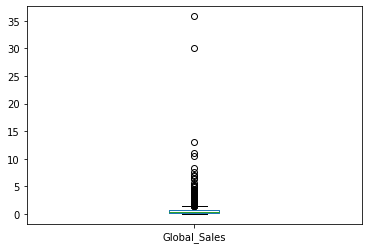

In [38]:
#4 Create plots to visualize the results
# Spring Global_Sales
print("Visualizing Spring Global_Sales")
glo_spring2 = data.loc[data['Season_Number'].isin(["0"]), 'Global_Sales']
glo_spring2.plot(kind="box")

Visualizing Summer NA_Sales


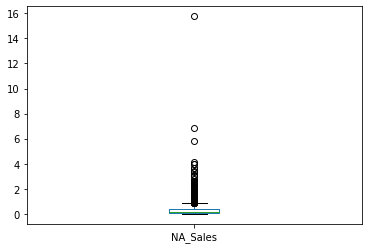

In [39]:
#4 Create plots to visualize the results
# Summer NA_Sales
print("Visualizing Summer NA_Sales")
na_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'NA_Sales']
na_summer2.plot(kind="box")

Visualizing Summer EU_Sales


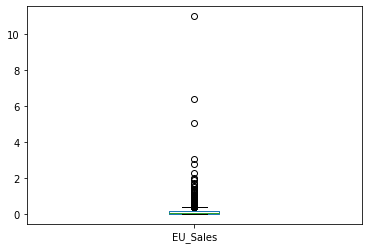

In [40]:
#4 Create plots to visualize the results
# Summer EU_Sales
print("Visualizing Summer EU_Sales")
eu_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'EU_Sales']
eu_summer2.plot(kind="box")

Visualizing Summer JP_Sales


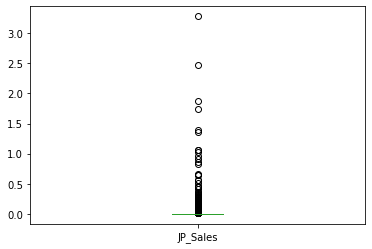

In [41]:
#4 Create plots to visualize the results
# Summer JP_Sales
print("Visualizing Summer JP_Sales")
jp_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'JP_Sales']
jp_summer2.plot(kind="box")

Visualizing Summer Other_Sales


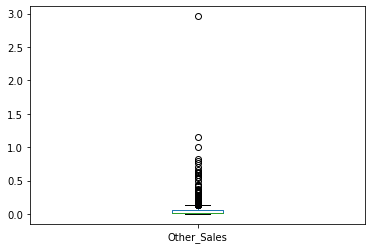

In [42]:
# Create plots to visualize the results
# Summer Other_Sales
print("Visualizing Summer Other_Sales")
oth_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Other_Sales']
oth_summer2.plot(kind="box")

Visualizing Summer Global_Sales


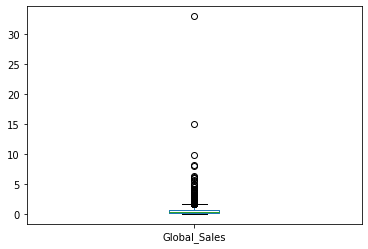

In [43]:
#4 Create plots to visualize the results
# Summer Global_Sales
print("Visualizing Summer Global_Sales")
glo_summer2 = data.loc[data['Season_Number'].isin(["1"]), 'Global_Sales']
glo_summer2.plot(kind="box")

Visualizing Autumn NA_Sales


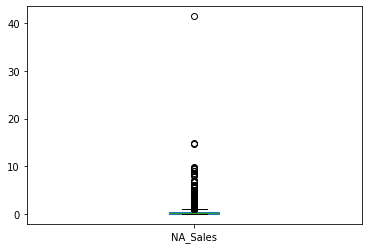

In [44]:
#4 Create plots to visualize the results
# Autumn NA_Sales
print("Visualizing Autumn NA_Sales")
na_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'NA_Sales']
na_autumn2.plot(kind="box")

Visualizing Autumn EU_Sales


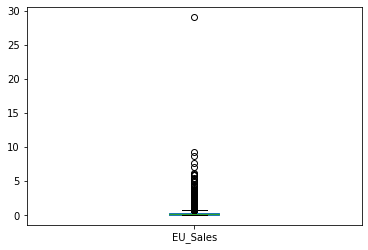

In [45]:
#4 Create plots to visualize the results
# Autumn EU_Sales
print("Visualizing Autumn EU_Sales")
eu_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'EU_Sales']
eu_autumn2.plot(kind="box")

Visualizing Autumn JP_Sales


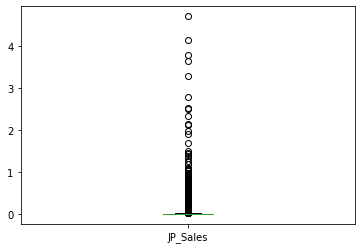

In [46]:
#4 Create plots to visualize the results
# Autumn JP_Sales
print("Visualizing Autumn JP_Sales")
jp_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'JP_Sales']
jp_autumn2.plot(kind="box")

Visualizing Autumn Other_Sales


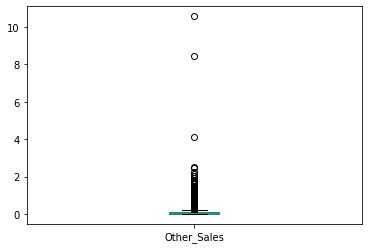

In [47]:
#4 Create plots to visualize the results
# Autumn Other_Sales
print("Visualizing Autumn Other_Sales")
oth_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Other_Sales']
oth_autumn2.plot(kind="box")

Visualizing Autumn Global_Sales


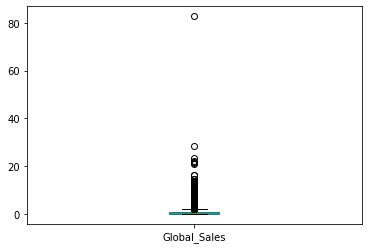

In [48]:
#4 Create plots to visualize the results
# Autumn Global_Sales
print("Visualizing Autumn Global_Sales")
glo_autumn2 = data.loc[data['Season_Number'].isin(["2"]), 'Global_Sales']
glo_autumn2.plot(kind="box")

Visualizing Winter NA_Sales


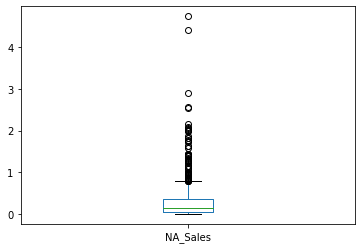

In [49]:
#4 Create plots to visualize the results
# Winter NA_Sales
print("Visualizing Winter NA_Sales")
na_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'NA_Sales']
na_winter2.plot(kind="box")

Visualizing Winter EU_Sales


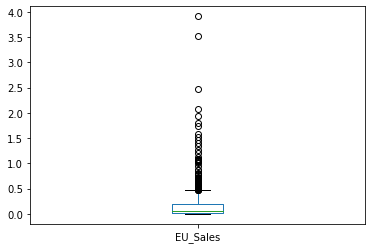

In [50]:
#4 Create plots to visualize the results
# Winter EU_Sales
print("Visualizing Winter EU_Sales")
eu_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'EU_Sales']
eu_winter2.plot(kind="box")

Visualizing Winter JP_Sales


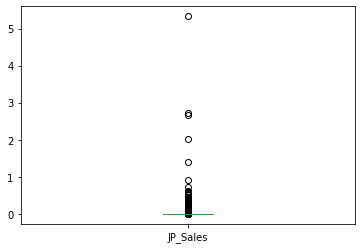

In [51]:
#4 Create plots to visualize the results
# Winter JP_Sales
print("Visualizing Winter JP_Sales")
jp_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'JP_Sales']
jp_winter2.plot(kind="box")

Visualizing Winter Other_Sales


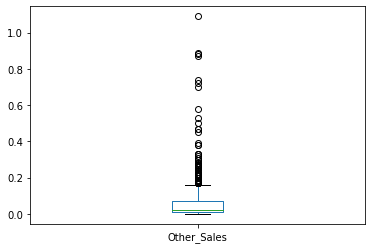

In [52]:
#4 Create plots to visualize the results
# Winter Other_Sales
print("Visualizing Winter Other_Sales")
oth_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Other_Sales']
oth_winter2.plot(kind="box")

Visualizing Winter Global_Sales


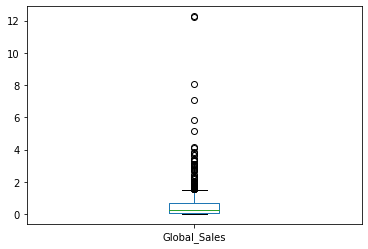

In [53]:
#4 Create plots to visualize the results
# Winter Global_Sales
print("Visualizing Winter Global_Sales")
glo_winter2 = data.loc[data['Season_Number'].isin(["3"]), 'Global_Sales']
glo_winter2.plot(kind="box")

Visualizing Spring Metascore


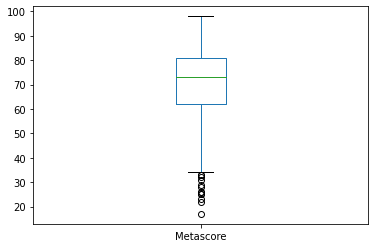

In [54]:
#4 Create plots to visualize the results
# Spring Metascore
print("Visualizing Spring Metascore")
spring_meta2 = data.loc[data['Season_Number'].isin(["0"]), 'Metascore']
spring_meta2.plot(kind="box")

Visualizing Summer Metascore


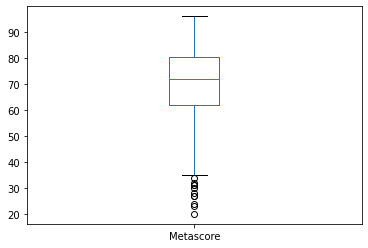

In [55]:
#4 Create plots to visualize the results
# Summer Metascore
print("Visualizing Summer Metascore")
summer_meta2 = data.loc[data['Season_Number'].isin(["1"]), 'Metascore']
summer_meta2.plot(kind="box")

Visualizing Autumn Metascore


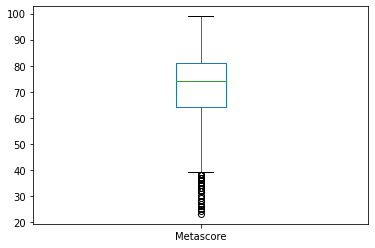

In [56]:
#4 Create plots to visualize the results
# Autumn Metascore
print("Visualizing Autumn Metascore")
autumn_meta2 = data.loc[data['Season_Number'].isin(["2"]), 'Metascore']
autumn_meta2.plot(kind="box")

Visualizing Winter Metascore


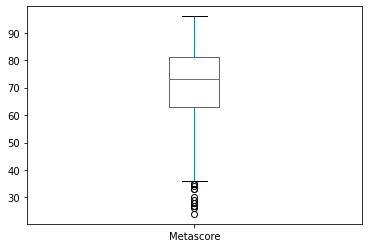

In [57]:
#4 Create plots to visualize the results
# Winter Metascore
print("Visualizing Winter Metascore")
winter_meta2 = data.loc[data['Season_Number'].isin(["3"]), 'Metascore']
winter_meta2.plot(kind="box")

Visualizing Spring Userscore


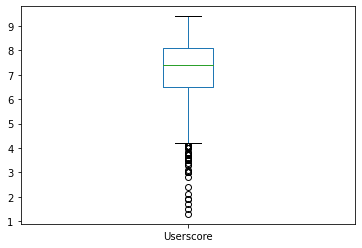

In [58]:
#4 Create plots to visualize the results
# Spring Userscore
print("Visualizing Spring Userscore")
spring_user2 = data.loc[data['Season_Number'].isin(["0"]), 'Userscore']
spring_user2.plot(kind="box")

Visualizing Summer Userscore


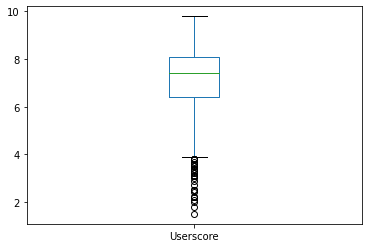

In [59]:
#4 Create plots to visualize the results
# Summer Userscore
print("Visualizing Summer Userscore")
summer_user2 = data.loc[data['Season_Number'].isin(["1"]), 'Userscore']
summer_user2.plot(kind="box")

Visualizing Autumn Userscore


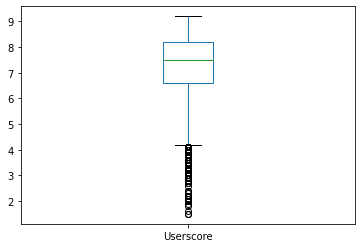

In [60]:
#4 Create plots to visualize the results
# Autumn Userscore
print("Visualizing Autumn Userscore")
autumn_user2 = data.loc[data['Season_Number'].isin(["2"]), 'Userscore']
autumn_user2.plot(kind="box")

Visualizing Winter Userscore


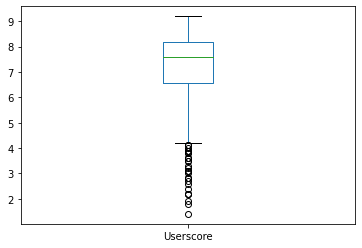

In [61]:
#4 Create plots to visualize the results
# Winter Userscore
print("Visualizing Winter Userscore")
winter_user2 = data.loc[data['Season_Number'].isin(["3"]), 'Userscore']
winter_user2.plot(kind="box")

In [62]:
# Add dummy variables
dummy = data[['Platform', 'Genre', 'Season']]
dummy = pd.get_dummies(data=dummy)
dummy.head()

,Platform_3DS,Platform_DS,Platform_Dreamcast,Platform_Game Boy Advance,Platform_GameCube,Platform_Nintendo 64,Platform_PC,Platform_PSP,Platform_PlayStation,Platform_PlayStation 2,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
# Concatenate new dataframe with old dataframe (minus some variables)
X = pd.concat([data.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 'Release_Date', 'Season', 'Season_Number', 'Global_Sales']), dummy], axis=1)
Y = data['Global_Sales']
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Metascore,Userscore,Platform_3DS,Platform_DS,Platform_Dreamcast,Platform_Game Boy Advance,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,41.49,29.02,3.77,8.46,76,8.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,15.85,12.88,3.79,3.31,82,8.4,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,15.75,11.01,3.28,2.96,80,8.1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,11.38,9.23,6.50,2.90,89,8.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14.59,7.06,4.70,2.26,87,8.3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# Explore the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 0 to 5732
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NA_Sales                   5733 non-null   float64
 1   EU_Sales                   5733 non-null   float64
 2   JP_Sales                   5733 non-null   float64
 3   Other_Sales                5733 non-null   float64
 4   Metascore                  5733 non-null   int64  
 5   Userscore                  5733 non-null   float64
 6   Platform_3DS               5733 non-null   uint8  
 7   Platform_DS                5733 non-null   uint8  
 8   Platform_Dreamcast         5733 non-null   uint8  
 9   Platform_Game Boy Advance  5733 non-null   uint8  
 10  Platform_GameCube          5733 non-null   uint8  
 11  Platform_Nintendo 64       5733 non-null   uint8  
 12  Platform_PC                5733 non-null   uint8  
 13  Platform_PSP               5733 non-null   uint8

In [65]:
# Partition the dataset into a training set and a validation set using the holdout method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,train_size = 0.75,random_state = 0)
X_train, X_vals, Y_train, Y_vals = train_test_split(X_train, Y_train, test_size = 0.25, train_size = 0.75,  random_state = 0)

In [66]:
# Standardize the training set and the validation set (NOT RECOMMENDED FOR DUMMY VARIABLES)
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_vals_scaled = scaler.transform(X_vals)

In [67]:
# Build a LASSO regression model to predict 'Global_Sales'
fitted_model = linear_model.Lasso(alpha = 1).fit(X = x_train_scaled[:, :], y = Y_train)
print(fitted_model.coef_)

[ 0.72576583  0.55357641  0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
 -0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.        ]


In [68]:
# Use the LASSO regression model to predict 'Global_Sales'
predicted = fitted_model.predict(x_vals_scaled[:, :])

# Compute the coefficient of determination of the LASSO regression model
corr_coef = np.corrcoef(predicted, Y_vals.values)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.9866737820950376


In [70]:
# Build a linear regression model to predict 'Global_Sales'
model = linear_model.LinearRegression().fit(X = x_train_scaled[:, [0, 1, 2, 3, 15, 24, 33]], y = Y_train)

# 0 - NA Sales, 1 - EU Sales, 2 - JP Sales, 3 - Other Sales,
# 15 - PS2 (Platform), 24 - Action (Genre), 33 - Simulation (Genre)
# Compute evaluation metrics for the validation set and report your results.
Rsqr_val = model.score(X = x_vals_scaled[:, [0, 1, 2, 3, 15, 24, 33]], y = Y_vals)
print(Rsqr_val)

0.9999870770319683
